In [26]:
import pandas as pd

c_df = pd.read_csv('./datasets/Airline Quality Ratings.csv')
c_df


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [19]:
c_df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [27]:
c_df.duplicated().sum()
c_df.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder

columns =  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'] 

# columns = ft.iloc[:,:-1]

encoders = {}

for column in columns:
    encoder = LabelEncoder()
    c_df[column] = encoder.fit_transform(c_df[column].tolist())
    encoders[column] = encoder
    # print(f'{column}: {encoder.classes_}')


# state_encoder = LabelEncoder()
# state = state_encoder.fit_transform(a_df['Status'].tolist())
# a_df['Status'] = state

c_df = c_df.drop(labels=['ID'], axis=1)

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.5, random_state=124)


X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 일반적으로 데이터 세트가 작을 경우 liblinear의 성능이 좋고, 큰 경우 'sag', 'saga'가 더 좋다.
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)
logistic_r.fit(X_train, y_train)
prediction = logistic_r.predict(X_test)


오차 행렬
[[13263  1382]
 [ 1870  9383]]
정확도: 0.8744, 정밀도: 0.8716, 재현율: 0.8338, F1: 0.8523, ROC-AUC: 0.8697
################################################################################


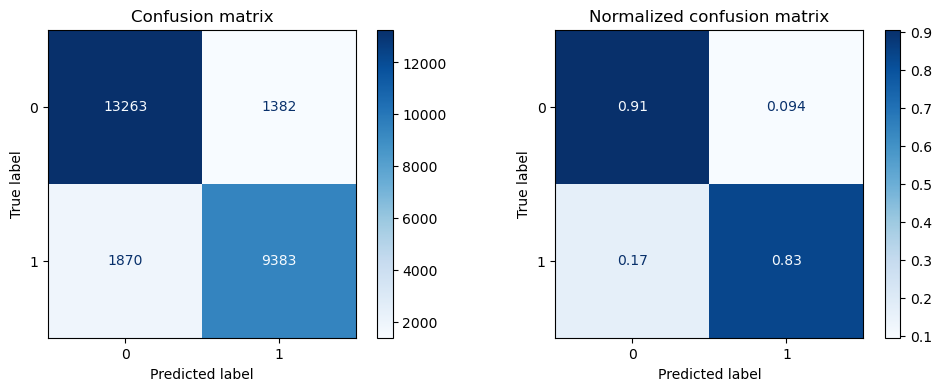

In [7]:
get_evaluation(y_test, prediction, logistic_r, X_test)

In [13]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Logistic Regression 모델 생성
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)

# k-fold 교차 검증 수행 (여기서는 k=5)
kfold = KFold(n_splits=10, shuffle=True, random_state=124)
cv_scoresa = cross_val_score(logistic_r, X_train, y_train, cv=kfold)

# 교차 검증 결과 출력
print("Cross-validation scores train:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores train: [0.86911197 0.87027027 0.87683398 0.87451737 0.86911197 0.87799228
 0.87220077 0.87606178 0.87524141 0.87640015]
Mean CV accuracy: 0.8737741946548436


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 생성
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)

# k-fold 교차 검증 수행 (여기서는 k=5)
kfold = KFold(n_splits=10, shuffle=True, random_state=124)
cv_scoresb = cross_val_score(logistic_r, X_train_val, y_train_val, cv=kfold)

# 교차 검증 결과 출력
print("Cross-validation scores train_var:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores train_var: [0.86911197 0.87027027 0.87683398 0.87451737 0.86911197 0.87799228
 0.87220077 0.87606178 0.87524141 0.87640015]
Mean CV accuracy: 0.8737741946548436


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 생성
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)

# k-fold 교차 검증 수행 (여기서는 k=5)
kfold = KFold(n_splits=10, shuffle=True, random_state=124)
cv_scoresc = cross_val_score(logistic_r, X_test, y_test, cv=kfold)

# 교차 검증 결과 출력

print("Cross-validation scores train:", cv_scoresa)
print("Mean CV accuracy:", cv_scoresa.mean())

print("Cross-validation scores train_var:", cv_scoresb)
print("Mean CV accuracy:", cv_scoresb.mean())

print("Cross-validation scores test:", cv_scoresc)
print("Mean CV accuracy:", cv_scoresc.mean())


Cross-validation scores train: [0.87382952 0.8748914  0.87373299 0.88058693 0.87576021 0.87325031
 0.86861666 0.87614635 0.87045082 0.87777563]
Mean CV accuracy: 0.8745040812398143
Cross-validation scores train_var: [0.87239382 0.87528958 0.87818533 0.89073359 0.87970651 0.87005213
 0.87777563 0.86870052 0.87912724 0.87294845]
Mean CV accuracy: 0.8764912801251864
Cross-validation scores test: [0.86911197 0.87027027 0.87683398 0.87451737 0.86911197 0.87799228
 0.87220077 0.87606178 0.87524141 0.87640015]
Mean CV accuracy: 0.8737741946548436


In [22]:
print("Cross-validation scores train:", cv_scoresa)


print("Cross-validation scores train_var:", cv_scoresb)


print("Cross-validation scores test:", cv_scoresc)
print("train CV accuracy:", cv_scoresa.mean())
print("train_var CV accuracy:", cv_scoresb.mean())
print("test CV accuracy:", cv_scoresc.mean())


Cross-validation scores train: [0.87382952 0.8748914  0.87373299 0.88058693 0.87576021 0.87325031
 0.86861666 0.87614635 0.87045082 0.87777563]
Cross-validation scores train_var: [0.87239382 0.87528958 0.87818533 0.89073359 0.87970651 0.87005213
 0.87777563 0.86870052 0.87912724 0.87294845]
Cross-validation scores test: [0.86911197 0.87027027 0.87683398 0.87451737 0.86911197 0.87799228
 0.87220077 0.87606178 0.87524141 0.87640015]
train CV accuracy: 0.8745040812398143
train_var CV accuracy: 0.8764912801251864
test CV accuracy: 0.8737741946548436


임계치 조정

양성(Positive): 항공사 서비스 만족
음성(Negative): 항공사 서비스 불만족 
.

True Positive (TP):항공사 서비스에 만족을 한다고 예측  -> 실제로 만족

False Positive (FP) : 항공사 서비스에 대한 불만족을 예측했지만 실제로는 만족한 경우입니다. (오류, error)

(True Negativ (TN) ): 항공사 서비스에 대한 만족을 예측했고, 실제로도 만족하지 않은 경우입니다
.N(False Negati (FN) e): 항공사 서비스에 대한 만족을 예측했지만 실제로는 불만족한 경우입니다(놓침, error II)다.정밀도(Precision)는 모델이 만족을 예측한 경우 중에서 실제로 고객이 만족한 비율을 의미합니다.
재현율(Recall)은 실제로 만족한 고객 중에서 모델이 정확하게 만족을 감지한 비율을 나타냅니다.다.

🏆임계치낮춰여재현율을도를 높여주는 것이 적합하다.

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def precision_recall_curve_plot(y_test, proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)

    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()



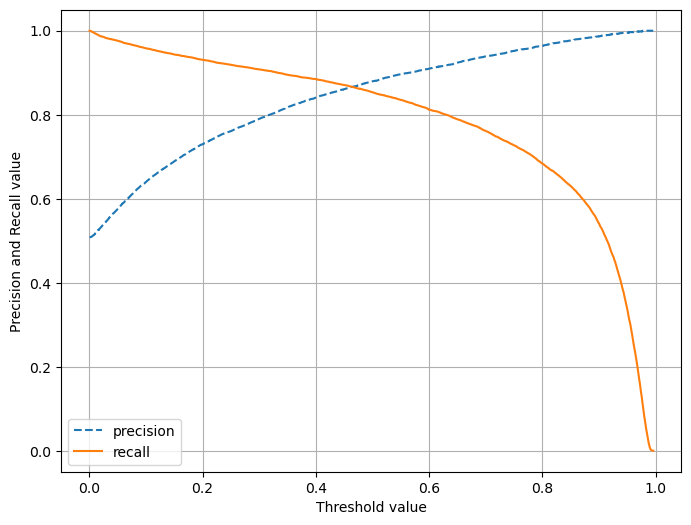

In [37]:
# 테스트 세트의 예측 확률을 얻어오는 부분
proba_class1 = logistic_r.predict_proba(X_test)[:, 1]

# 정밀도-재현율 곡선 그리기
precision_recall_curve_plot(y_test, proba_class1)


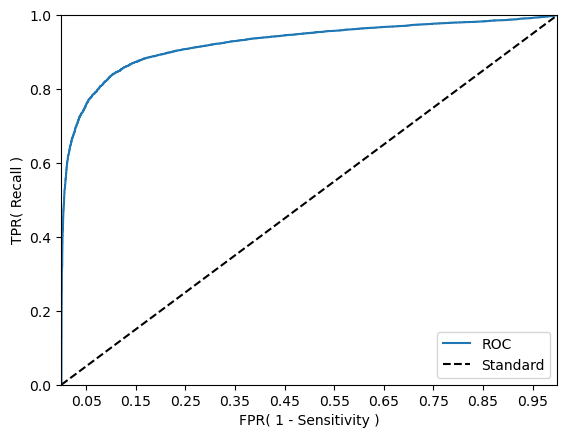

In [38]:
from sklearn.metrics import roc_curve
import numpy as np

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, proba_class1)

In [39]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = logistic_r.predict_proba(X_test)
prediction = logistic_r.predict(X_test)

In [40]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[9737 1336]
 [1674 9758]]
정확도: 0.8663, 정밀도: 0.8796, 재현율: 0.8536, F1: 0.8664, ROC-AUC: 0.8665
################################################################################


In [41]:
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([5.79852140e-04, 6.48260612e-04, 6.62846585e-04, ...,
       9.95008522e-01, 9.95458776e-01, 9.95737560e-01])

오차 행렬
[[ 7774  3299]
 [  929 10503]]
정확도: 0.8121, 정밀도: 0.7610, 재현율: 0.9187, F1: 0.8324, ROC-AUC: 0.8104
################################################################################


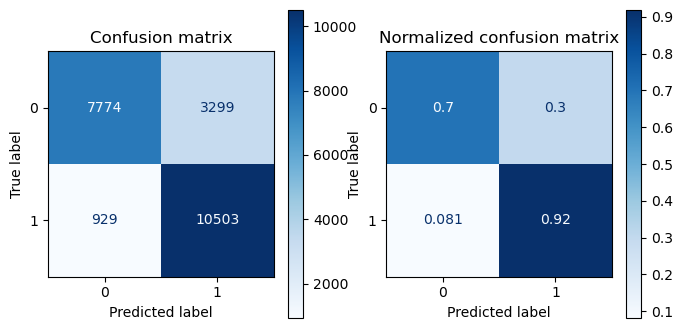

In [42]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=0.25).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.5, random_state=124)


# 일반적으로 데이터 세트가 작을 경우 liblinear의 성능이 좋고, 큰 경우 'sag', 'saga'가 더 좋다.
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)
logistic_r.fit(X_train, y_train)
prediction = logistic_r.predict(X_test)


오차 행렬
[[9737 1336]
 [1674 9758]]
정확도: 0.8663, 정밀도: 0.8796, 재현율: 0.8536, F1: 0.8664, ROC-AUC: 0.8665
################################################################################


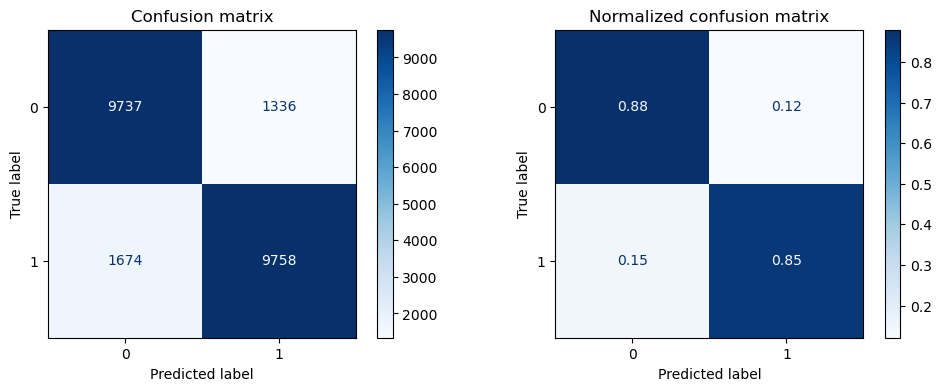

In [31]:
get_evaluation(y_test, prediction, logistic_r, X_test)

In [29]:
output0 = c_df[c_df['Satisfaction'] == 0].sample(56262, random_state=124)
output1 = c_df[c_df['Satisfaction'] == 1]


c_df = pd.concat([output0, output1]).reset_index(drop=True)
c_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,66,1,1,1,358,0,0.0,1,2,...,3,4,1,4,4,2,2,4,2,0
1,0,58,1,0,1,719,6,1.0,5,5,...,4,3,3,3,2,4,3,4,4,0
2,1,53,1,1,1,712,0,0.0,3,3,...,5,5,1,5,5,4,3,5,5,0
3,1,21,1,1,1,606,9,5.0,5,1,...,4,4,2,4,4,5,1,4,4,0
4,1,50,1,1,1,259,0,0.0,4,2,...,2,1,4,1,1,2,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112519,1,59,1,1,1,341,0,0.0,2,4,...,4,1,3,4,4,3,5,4,3,1
112520,1,28,0,0,0,599,53,54.0,4,4,...,3,2,5,2,2,5,4,2,5,1
112521,1,20,0,0,0,1188,5,0.0,4,0,...,4,3,1,4,4,1,0,4,3,1
112522,0,38,1,1,1,907,17,5.0,5,3,...,5,1,3,1,1,4,4,1,5,1


In [23]:
c_df.Satisfaction.value_counts()

Satisfaction
0    73225
1    56262
Name: count, dtype: int64

In [21]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, 1:], c_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Gender   R-squared (uncentered):                   0.491
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              5680.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        17:21:54   Log-Likelihood:                         -94151.
No. Observations:              129487   AIC:                                  1.883e+05
Df Residuals:                  129465   BIC:                                  1.886e+05
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [24]:
get_vif(features)

,vif_score,feature
0,8.249282,Age
1,8.684513,Customer Type
2,3.071203,Type of Travel
3,2.818096,Class
4,3.183798,Flight Distance
5,16.859025,Departure Delay
6,16.949858,Arrival Delay
7,8.358292,Departure and Arrival Time Convenience
8,13.241212,Ease of Online Booking
9,9.408612,Check-in Service


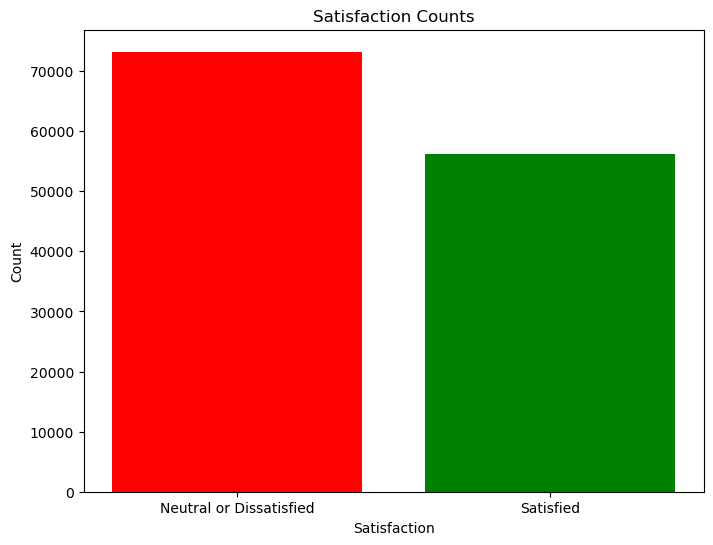

In [43]:
import matplotlib.pyplot as plt

# 데이터
labels = ['Neutral or Dissatisfied', 'Satisfied']
counts = [73225, 56262]

# 바 그래프 생성
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['red', 'green'])

# 그래프 제목 및 축 레이블
plt.title('Satisfaction Counts')
plt.xlabel('Satisfaction')
plt.ylabel('Count')

# 그래프 보이기
plt.show()
